In [35]:
from pylab import*
%matplotlib inline
%run Funciones_y_todo_lo_necesario.ipynb

La ecuacion de movimiento para la pelota que cae es la siguiente: 

$$ m\ddot{\vec{r}} = -mg \hat{j} + f(\dot{\vec{r}}) $$

Donde $f(\dot{\vec{r}})$ es el factor de la contribución por fricción. La fricción, para este problema la vamos a asumir de dos posibles formas: proporcional a la velocidad ó al cuadrado de la velocidad. 

De lo anterior tenemos dos posible ecuaciones: 

a) $ m\ddot{\vec{r}} = -mg \hat{j} + \gamma \dot{\vec{r}} $

b) $ m\ddot{\vec{r}} = -mg \hat{j} + \gamma \dot{\vec{r}} \| \dot{\vec{r}} \| $

Y si hacemos los cambios de variables $u_1 = x $ , $u_2 = \dot{x} $ , $v_1 = y $ , $v_2 = \dot{y} $ tenemos que la ecuación diferencial se vuelte : 

$$ \left( \begin{array}{c} \dot{u_1} \\ \dot{v_1} \\ \dot{u_2} \\ \dot{v_2} \end{array} \right) = \left( u_2v_2\frac{1}{m} f(u_1)-g + \frac{1}{m} f(v_1) \right ) $$


In [36]:
#Modelos para la fricción: 

def fric_v(v,gamma=0.1): #proporcional con la velocidad
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y]) 

def fric_v2(v,gamma=0.1): #cuadrado de la velocidad
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y = gamma*norm_v*v[1]
    return array([f_x,f_y]) 

In [37]:
#Ecuación de movimiento: 

def e_mov(r_v,t,fric=0, g=9.8 ,m=1):
    dx = r_v[2]
    dy = r_v[3]
    if fric == 0: #cero hasta que sea remplazada con alguno de los modelos de arriba
        dvx,dvy = 0, (-g/m)
    else:
        dvx = - fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m)- fric([r_v[2],r_v[3]])[1]
    
    return array([dx,dy,dvx,dvy])

Cuando en clase hicimos el caso para el cual la pelota rebotaba con el piso, lo que hacíamos era reflejar la componente $y$, y la componente $x$ no cambiaba. En este caso (con el plano inclinado) lo que pasa es que la componente perpendicular de la velocidad va a cambiar mientras que la paralela se mantije fija. Para poder modelar este cambio hay que rotar las velocidades dependiendo del ángulo de inclinación. 

Para esto usaremos tres funciones: 

1.- la función que nos determine la inclinación del plano 

2.- la función con la que definamos el rebote de la pelota 

3.- la función que rote las velocidades 

In [38]:
def plano(x,angulo_p):
    return -tan(angulo_p*pi/180.)*x

In [39]:
def rebote(r_v_i,mi_dt,ang,modelo_fric=0):
    
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],modelo_fric)
    y_med = sol[-1,:]

    while abs(y_izq[1]-plano(y_izq[0],ang))>1e-5:
        if (y_izq[1]-plano(y_izq[0],ang))*(y_med[1]-plano(y_med[0],ang))<0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t, sol = rk4(e_mov, reinicio,[0,dt_busqueda],modelo_fric)
        y_izq = reinicio
        y_med = sol[-1,:]
    y_izq = dot(rotacion_vel(ang),y_izq)
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq

In [40]:
def rotacion_vel(angulo):
    angulo = angulo*pi/180.
    
    #según el cambio de coordenadas adecuado:
    return array([1,0,0,0]),array([0,1,0,0]),array([0,0,cos(angulo),-sin(angulo)]),array([0,0,sin(angulo),cos(angulo)])


# a) y b)

## En el plano sin inclinación:

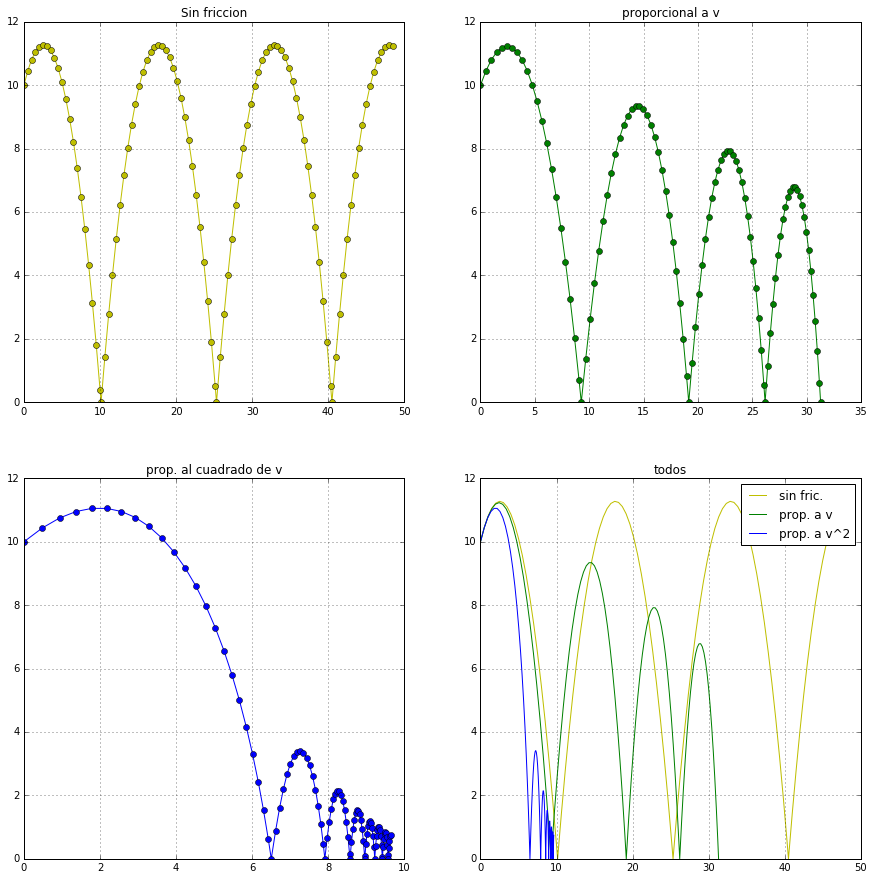

In [66]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(221)
bx = fig.add_subplot(222) 
cx = fig.add_subplot(223)
dx = fig.add_subplot(224)

ax.set_title("Sin friccion")
bx.set_title("proporcional a v")
cx.set_title("prop. al cuadrado de v")
dx.set_title("todos")

#Sin Fricción
trayectoria_0 = datos_graf([0,10,5,5], 0, 0)
ax.plot(trayectoria_0[:,0],trayectoria_0[:,1],'-o',color = 'y')

#Proporcional a v
trayectoria_pv = datos_graf([0,10,5,5], 0, fric_v)
bx.plot(trayectoria_pv[:,0],trayectoria_pv[:,1],'-o',color = 'g')

#Prop. al cuadrado de v
trayectoria_pv2 = datos_graf([0,10,5,5], 0, fric_v2)
cx.plot(trayectoria_pv2[:,0],trayectoria_pv2[:,1],'-o',color = 'b')


#Todos
dx.plot(trayectoria_0[:,0],trayectoria_0[:,1],'-',color = 'y' , label= "sin fric.")
dx.plot(trayectoria_pv[:,0],trayectoria_pv[:,1],'-',color = 'g', label = "prop. a v")
dx.plot(trayectoria_pv2[:,0],trayectoria_pv2[:,1],'-',color = 'b' , label = "prop. a v^2")


dx.legend()

ax.grid(True)
bx.grid(True)
cx.grid(True)
dx.grid(True)
show()

## Con inclinación de 15º

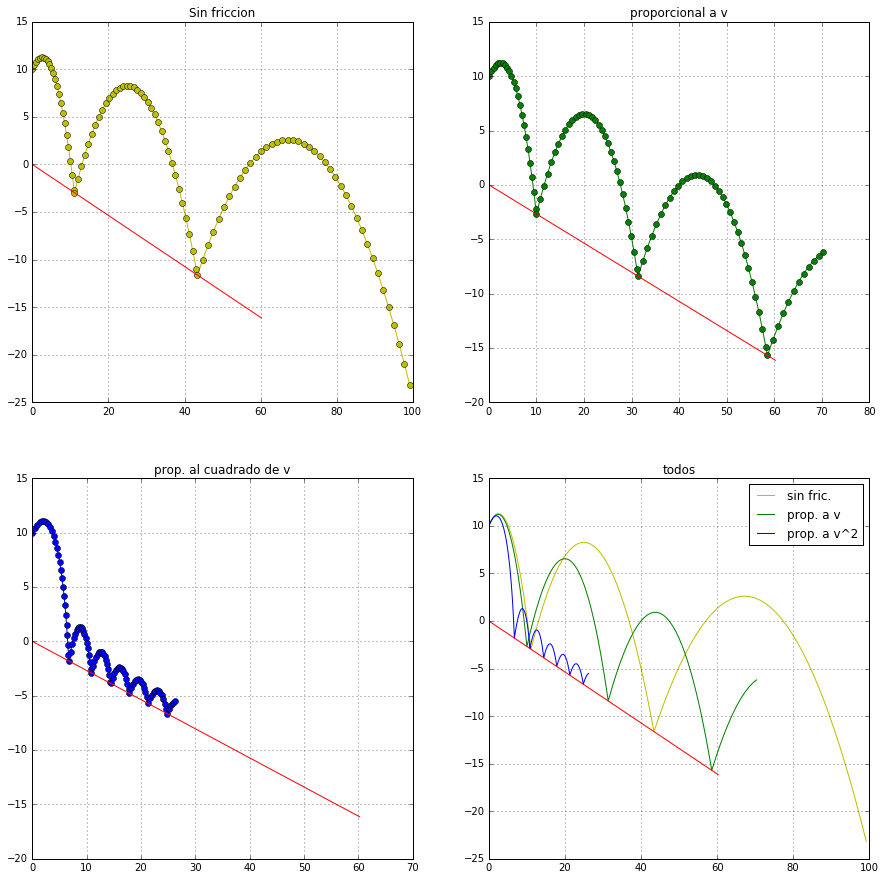

In [75]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(221)
bx = fig.add_subplot(222) 
cx = fig.add_subplot(223)
dx = fig.add_subplot(224)

ax.set_title("Sin friccion")
bx.set_title("proporcional a v")
cx.set_title("prop. al cuadrado de v")
dx.set_title("todos")

#Sin Fricción
trayectoria_0 = datos_graf([0,10,5,5], 15 , 0)
ax.plot(trayectoria_0[:,0],trayectoria_0[:,1],'-o',color = 'y')
ax.plot(trayectoria[:,0],plano(trayectoria[:,0],15), color = 'r')

#Proporcional a v
trayectoria_pv = datos_graf([0,10,5,5], 15 , fric_v)
bx.plot(trayectoria_pv[:,0],trayectoria_pv[:,1],'-o',color = 'g')
bx.plot(trayectoria[:,0],plano(trayectoria[:,0],15) , color = 'r' )

#Prop. al cuadrado de v
trayectoria_pv2 = datos_graf([0,10,5,5], 15 , fric_v2)
cx.plot(trayectoria_pv2[:,0],trayectoria_pv2[:,1],'-o',color = 'b')
cx.plot(trayectoria[:,0],plano(trayectoria[:,0],15) , color = 'r')

#Todos
dx.plot(trayectoria_0[:,0],trayectoria_0[:,1],'-',color = 'y' , label= "sin fric.")
dx.plot(trayectoria_pv[:,0],trayectoria_pv[:,1],'-',color = 'g', label = "prop. a v")
dx.plot(trayectoria_pv2[:,0],trayectoria_pv2[:,1],'-',color = 'b' , label = "prop. a v^2")
dx.plot(trayectoria[:,0],plano(trayectoria[:,0],15) , color = 'r')

dx.legend()

ax.grid(True)
bx.grid(True)
cx.grid(True)
dx.grid(True)
show()

#no sé por qué no me termina de trazar la línea completa

## Con inclinación de 30º

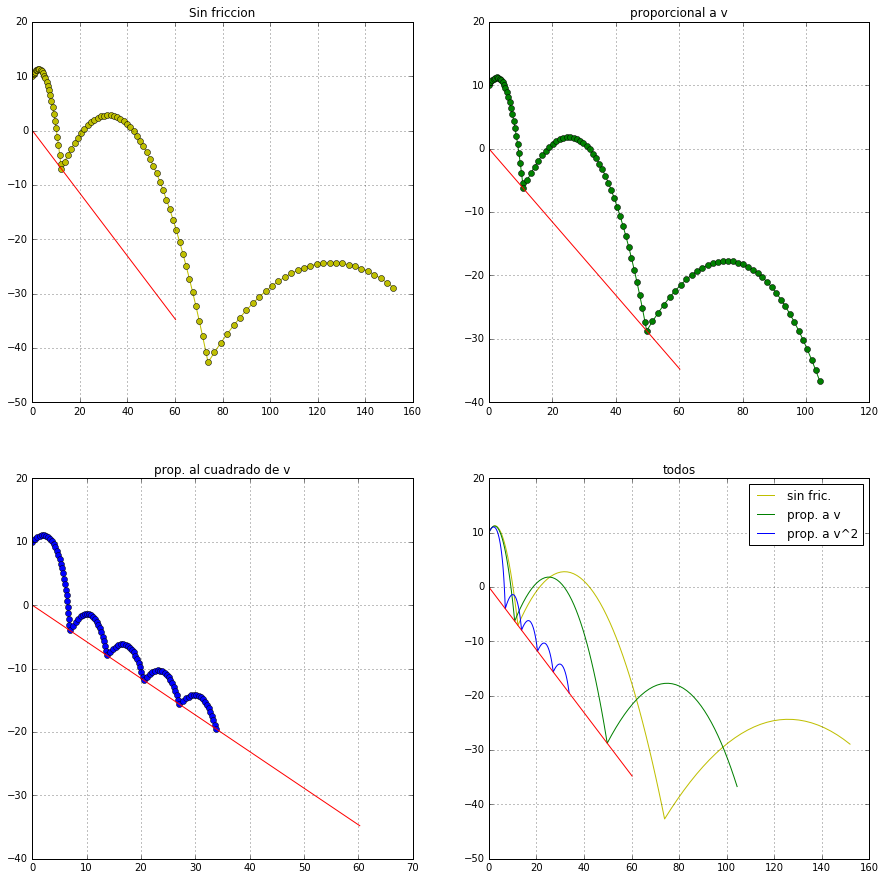

In [76]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(221)
bx = fig.add_subplot(222) 
cx = fig.add_subplot(223)
dx = fig.add_subplot(224)

ax.set_title("Sin friccion")
bx.set_title("proporcional a v")
cx.set_title("prop. al cuadrado de v")
dx.set_title("todos")

#Sin Fricción
trayectoria_0 = datos_graf([0,10,5,5], 30 , 0)
ax.plot(trayectoria_0[:,0],trayectoria_0[:,1],'-o',color = 'y')
ax.plot(trayectoria[:,0],plano(trayectoria[:,0],30), color = 'r')

#Proporcional a v
trayectoria_pv = datos_graf([0,10,5,5], 30 , fric_v)
bx.plot(trayectoria_pv[:,0],trayectoria_pv[:,1],'-o',color = 'g')
bx.plot(trayectoria[:,0],plano(trayectoria[:,0],30) , color = 'r' )

#Prop. al cuadrado de v
trayectoria_pv2 = datos_graf([0,10,5,5], 30 , fric_v2)
cx.plot(trayectoria_pv2[:,0],trayectoria_pv2[:,1],'-o',color = 'b')
cx.plot(trayectoria[:,0],plano(trayectoria[:,0],30) , color = 'r')

#Todos
dx.plot(trayectoria_0[:,0],trayectoria_0[:,1],'-',color = 'y' , label= "sin fric.")
dx.plot(trayectoria_pv[:,0],trayectoria_pv[:,1],'-',color = 'g', label = "prop. a v")
dx.plot(trayectoria_pv2[:,0],trayectoria_pv2[:,1],'-',color = 'b' , label = "prop. a v^2")
dx.plot(trayectoria[:,0],plano(trayectoria[:,0],30) , color = 'r')

dx.legend()

ax.grid(True)
bx.grid(True)
cx.grid(True)
dx.grid(True)
show()

## Con inclinación de 45º

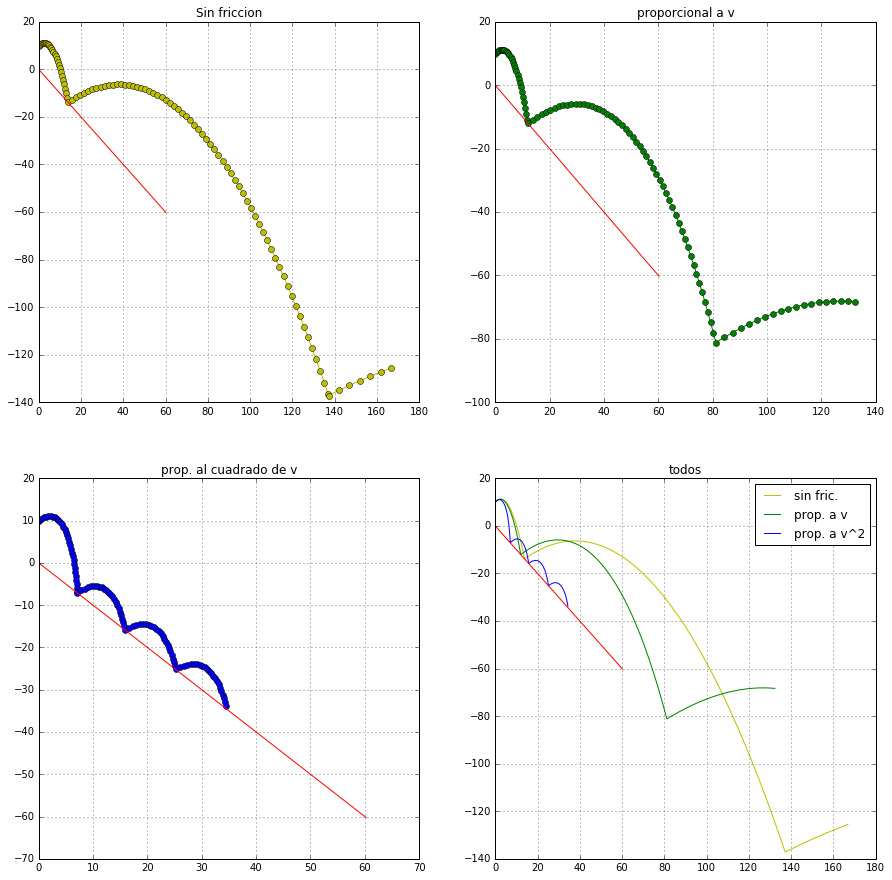

In [79]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(221)
bx = fig.add_subplot(222) 
cx = fig.add_subplot(223)
dx = fig.add_subplot(224)

ax.set_title("Sin friccion")
bx.set_title("proporcional a v")
cx.set_title("prop. al cuadrado de v")
dx.set_title("todos")

#Sin Fricción
trayectoria_0 = datos_graf([0,10,5,5], 45 , 0)
ax.plot(trayectoria_0[:,0],trayectoria_0[:,1],'-o',color = 'y')
ax.plot(trayectoria[:,0],plano(trayectoria[:,0],45), color = 'r')

#Proporcional a v
trayectoria_pv = datos_graf([0,10,5,5], 45 , fric_v)
bx.plot(trayectoria_pv[:,0],trayectoria_pv[:,1],'-o',color = 'g')
bx.plot(trayectoria[:,0],plano(trayectoria[:,0],45) , color = 'r' )

#Prop. al cuadrado de v
trayectoria_pv2 = datos_graf([0,10,5,5], 45 , fric_v2)
cx.plot(trayectoria_pv2[:,0],trayectoria_pv2[:,1],'-o',color = 'b')
cx.plot(trayectoria[:,0],plano(trayectoria[:,0],45) , color = 'r')

#Todos
dx.plot(trayectoria_0[:,0],trayectoria_0[:,1],'-',color = 'y' , label= "sin fric.")
dx.plot(trayectoria_pv[:,0],trayectoria_pv[:,1],'-',color = 'g', label = "prop. a v")
dx.plot(trayectoria_pv2[:,0],trayectoria_pv2[:,1],'-',color = 'b' , label = "prop. a v^2")
dx.plot(trayectoria[:,0],plano(trayectoria[:,0],45) , color = 'r')

dx.legend()

ax.grid(True)
bx.grid(True)
cx.grid(True)
dx.grid(True)
show()

# c)

Ahora lo que queremos es que la velocidad inicial cumpla con que: 

$$ tan^{-1}\left ( \frac{v_{0y}}{v_{0x}} \right ) > \alpha $$

Donde $\alpha = 15^{\circ} , 30^{\circ} , 45^{\circ} $



## Inclinación de 15º:

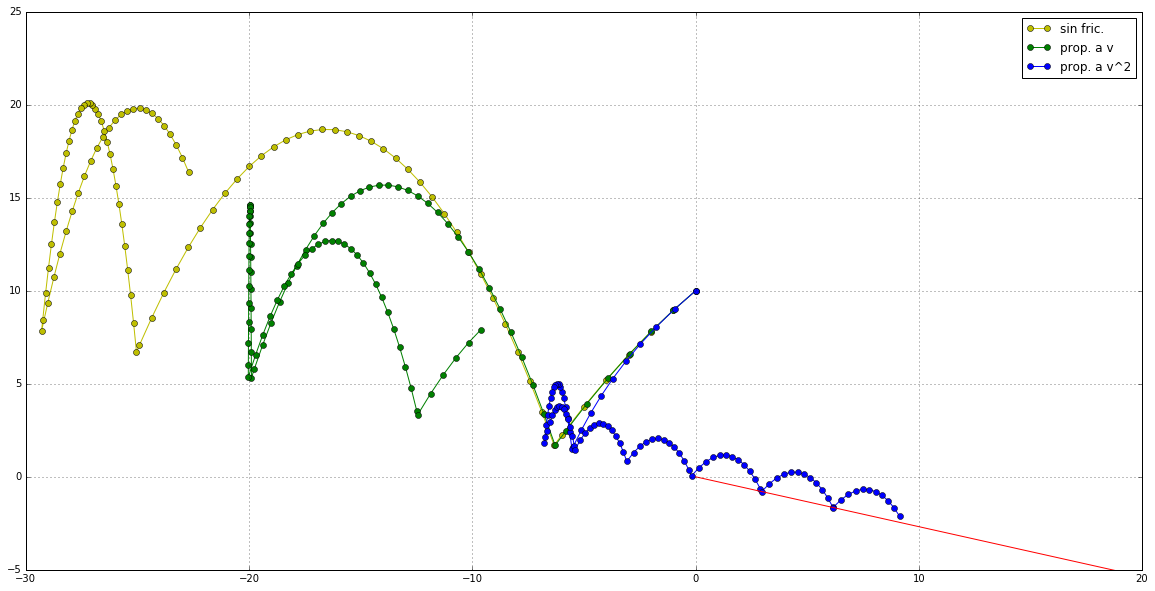

In [108]:
fig = plt.figure(figsize=(20,10))

trayectoria_0 = datos_graf([0,10,-10,-10], 15 , 0)
trayectoria_pv = datos_graf([0,10,-10,-10], 15 , fric_v)
trayectoria_pv2 = datos_graf([0,10,-10,-10], 15 , fric_v2)

plot(trayectoria_0[:,0],trayectoria_0[:,1],'-o',color = 'y' , label= "sin fric.")
plot(trayectoria_pv[:,0],trayectoria_pv[:,1],'-o',color = 'g', label = "prop. a v")
plot(trayectoria_pv2[:,0],trayectoria_pv2[:,1],'-o',color = 'b' , label = "prop. a v^2")
plot(trayectoria[:,0],plano(trayectoria[:,0],15) , color = 'r')

xlim([-30,20])
ylim([-5,25])

legend()

grid(True)

show()

#sigo sin saber por qué me corta la línea que representa al plano :(

## Inclinación de 30º:

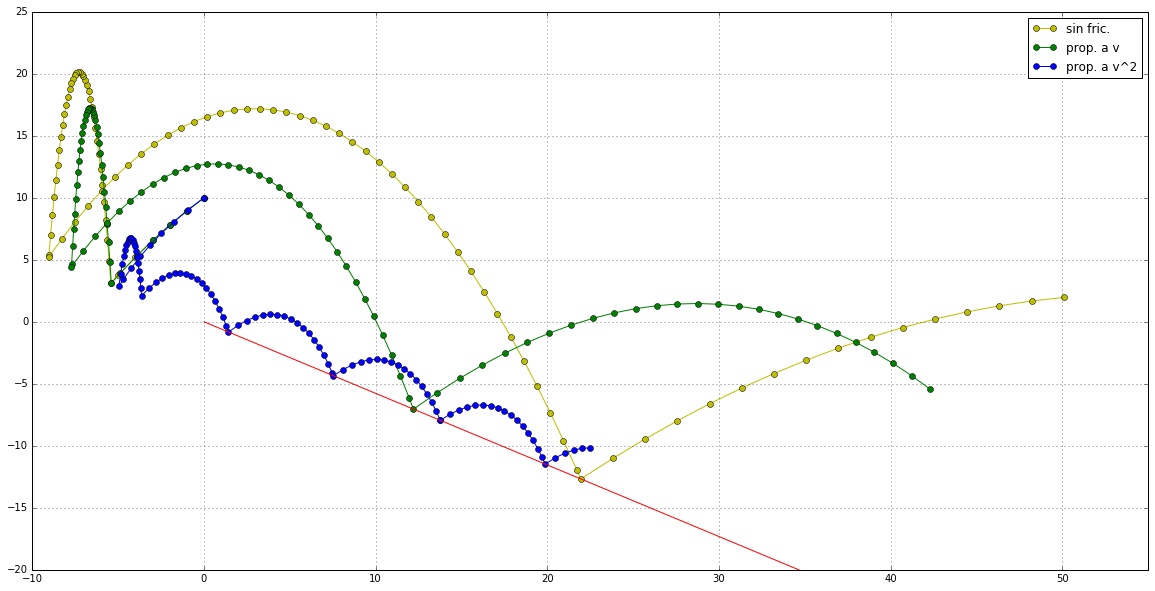

In [105]:
fig = plt.figure(figsize=(20,10))

trayectoria_0 = datos_graf([0,10,-10,-10], 30 , 0)
trayectoria_pv = datos_graf([0,10,-10,-10], 30 , fric_v)
trayectoria_pv2 = datos_graf([0,10,-10,-10], 30 , fric_v2)

plot(trayectoria_0[:,0],trayectoria_0[:,1],'-o',color = 'y' , label= "sin fric.")
plot(trayectoria_pv[:,0],trayectoria_pv[:,1],'-o',color = 'g', label = "prop. a v")
plot(trayectoria_pv2[:,0],trayectoria_pv2[:,1],'-o',color = 'b' , label = "prop. a v^2")
plot(trayectoria[:,0],plano(trayectoria[:,0],30) , color = 'r')

xlim([-10,55])
ylim([-20,25])
legend()

grid(True)

show()

## Inclinación a 45º:

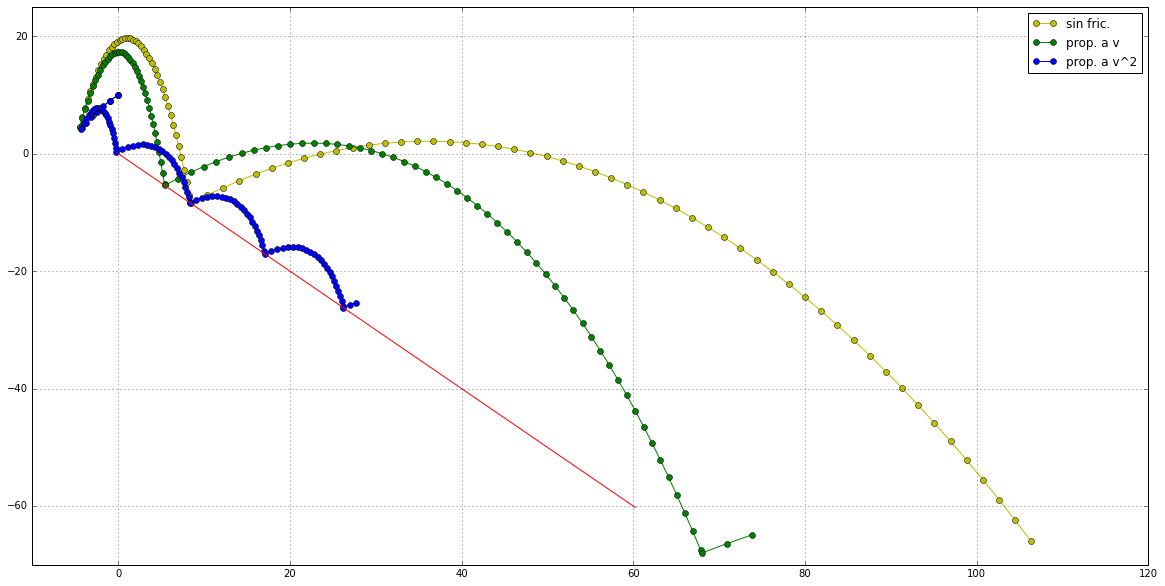

In [110]:
fig = plt.figure(figsize=(20,10))

trayectoria_0 = datos_graf([0,10,-10,-10], 45 , 0)
trayectoria_pv = datos_graf([0,10,-10,-10], 45 , fric_v)
trayectoria_pv2 = datos_graf([0,10,-10,-10], 45 , fric_v2)

plot(trayectoria_0[:,0],trayectoria_0[:,1],'-o',color = 'y' , label= "sin fric.")
plot(trayectoria_pv[:,0],trayectoria_pv[:,1],'-o',color = 'g', label = "prop. a v")
plot(trayectoria_pv2[:,0],trayectoria_pv2[:,1],'-o',color = 'b' , label = "prop. a v^2")
plot(trayectoria[:,0],plano(trayectoria[:,0],45) , color = 'r')

xlim([-10,120])
ylim([-70,25])
legend()

grid(True)

show()